In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading Training Data
df = pd.read_csv('CLC_train.csv')

In [3]:
#Total Null values in each column
null_val = (df[df == -200].count()*100)/df.shape[0]
for i in range(len(df.columns)):
    print("{} : {}".format(df.columns[i],null_val[i]))

Date : 0.0
Time : 0.0
CO_GT : 17.982631930527724
PT08_S1_CO : 4.315297261189045
NMHC_GT : 89.48563794255178
C6H6_GT : 4.315297261189045
PT08_S2_NMHC : 4.315297261189045
Nox_GT : 17.608550434201735
PT08_S3_Nox : 4.315297261189045
NO2_GT : 17.648630594522377
PT08_S4_NO2 : 4.315297261189045
PT08_S5_O3 : 4.315297261189045
T : 4.315297261189045
RH : 4.315297261189045
AH : 4.315297261189045
CO_level : 0.0


In [4]:
df = df[df != -200]

#### Every Label needs a range

In [5]:
#Finding null values in each label
for obj in set(df['CO_level']):
    print("Null values:{} for CO_GT Total values:{} for {}".format(df[df['CO_level']==obj]['CO_GT'].isna().sum(),len(df[df['CO_level']==obj]),obj))

Null values:1346 for CO_GT Total values:1346 for Very low
Null values:0 for CO_GT Total values:4641 for High
Null values:0 for CO_GT Total values:244 for Moderate
Null values:0 for CO_GT Total values:1245 for Low
Null values:0 for CO_GT Total values:9 for Very High


In [6]:
#Finding null values in each label
for obj in set(df['CO_level']):
    print("Null values:{} for NO2_GT Total values:{} for {}".format(df[df['CO_level']==obj]['NO2_GT'].isna().sum(),len(df[df['CO_level']==obj]),obj))

Null values:1020 for NO2_GT Total values:1346 for Very low
Null values:113 for NO2_GT Total values:4641 for High
Null values:18 for NO2_GT Total values:244 for Moderate
Null values:170 for NO2_GT Total values:1245 for Low
Null values:0 for NO2_GT Total values:9 for Very High


In [7]:
#Finding null values in each label
for obj in set(df['CO_level']):
    print("Null values:{} for Nox_GT Total values:{} for {}".format(df[df['CO_level']==obj]['Nox_GT'].isna().sum(),len(df[df['CO_level']==obj]),obj))

Null values:1020 for Nox_GT Total values:1346 for Very low
Null values:110 for Nox_GT Total values:4641 for High
Null values:18 for Nox_GT Total values:244 for Moderate
Null values:170 for Nox_GT Total values:1245 for Low
Null values:0 for Nox_GT Total values:9 for Very High


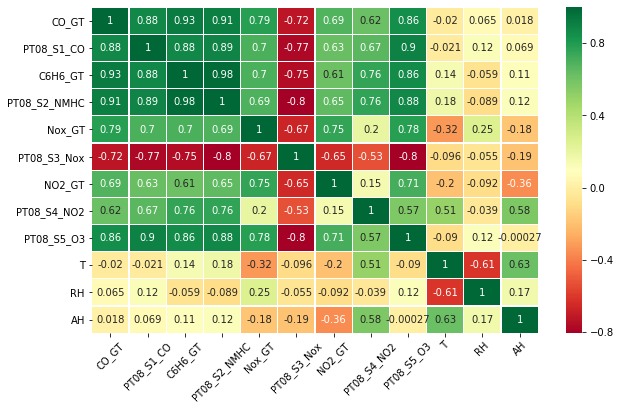

In [8]:
#Plotting the corr matrix
sns.heatmap(df.drop(columns=['Date','Time','CO_level','NMHC_GT']).corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.xticks(rotation=45)
plt.show()

### doing same for test data

In [9]:
#loading test data
test = pd.read_csv('CLC_test.csv')

Date : 0.0
Time : 0.0
CO_GT : 18.002136752136753
PT08_S1_CO : 2.297008547008547
NMHC_GT : 93.21581196581197
C6H6_GT : 2.297008547008547
PT08_S2_NMHC : 2.297008547008547
Nox_GT : 17.147435897435898
PT08_S3_Nox : 2.297008547008547
NO2_GT : 17.147435897435898
PT08_S4_NO2 : 2.297008547008547
PT08_S5_O3 : 2.297008547008547
T : 2.297008547008547
RH : 2.297008547008547
AH : 2.297008547008547
CO_level : 0.0
Null values:337 for CO_GT Total values:337 for Very low
Null values:0 for CO_GT Total values:1160 for High
Null values:0 for CO_GT Total values:61 for Moderate
Null values:0 for CO_GT Total values:311 for Low
Null values:0 for CO_GT Total values:3 for Very High
 
Null values:206 for Nox_GT Total values:337 for Very low
Null values:64 for Nox_GT Total values:1160 for High
Null values:1 for Nox_GT Total values:61 for Moderate
Null values:50 for Nox_GT Total values:311 for Low
Null values:0 for Nox_GT Total values:3 for Very High
 
Null values:206 for NO2_GT Total values:337 for Very low
Null 

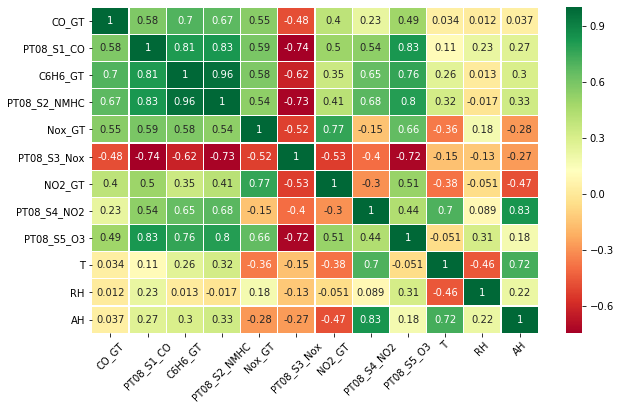

In [10]:

#Total Null values in each column
null_val = (test[test == -200].count()*100)/test.shape[0]
for i in range(len(test.columns)):
    print("{} : {}".format(test.columns[i],null_val[i]))

test = test[test != -200]

#Finding null values in each label
for obj in set(test['CO_level']):
    print("Null values:{} for CO_GT Total values:{} for {}".format(test[test['CO_level']==obj]['CO_GT'].isna().sum(),len(test[test['CO_level']==obj]),obj))
print(" ")
#Finding null values in each label
for obj in set(test['CO_level']):
    print("Null values:{} for Nox_GT Total values:{} for {}".format(test[test['CO_level']==obj]['Nox_GT'].isna().sum(),len(test[test['CO_level']==obj]),obj))
print(" ")
#Finding null values in each label
for obj in set(test['CO_level']):
    print("Null values:{} for NO2_GT Total values:{} for {}".format(test[test['CO_level']==obj]['NO2_GT'].isna().sum(),len(test[test['CO_level']==obj]),obj))

#Plotting the corr matrix
sns.heatmap(test.drop(columns=['Date','Time','CO_level','NMHC_GT']).corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.xticks(rotation=45)
plt.show()

In [11]:
print(df[df['CO_level']=='Low']['CO_GT'].mean())
print(min(df[df['CO_level']=='Low']['CO_GT']))

0.6995180722891566
0.4


Imputing data according to the labels should other result.

In [12]:
def impute_values(df,value):
    #For CO_GT, only 'Very Low' labels, data need to be imputed
    df.at[df['CO_GT'].isna(),'CO_GT'] = 0.23
    if value == {}:
        #For NO2_GT
        no2 = {}
        for obj in set(df['CO_level']):
            val = df[df['CO_level']==obj]['NO2_GT'].median()
            df.at[(df['CO_level']==obj) & (df['NO2_GT'].isna()),'NO2_GT'] = val
            no2[obj]=val
        #For Nox_Gt
        nox = {}
        for obj in set(df['CO_level']):
            val = df[df['CO_level']==obj]['Nox_GT'].median()
            df.at[(df['CO_level']==obj) & (df['Nox_GT'].isna()),'Nox_GT'] = val
            nox[obj]=val
        value['NO2_GT']=no2
        value['Nox_GT']=nox

    else:
        no2 = value['NO2_GT']
        for obj in set(df['CO_level']):
            df.at[(df['CO_level']==obj) & (df['NO2_GT'].isna()),'NO2_GT'] = no2[obj]
        
        nox = value['Nox_GT']
        for obj in set(df['CO_level']):
            df.at[(df['CO_level']==obj) & (df['Nox_GT'].isna()),'Nox_GT'] = nox[obj]

    return (df,value)

In [13]:
data = pd.concat([df,test],axis=0)
data.drop(columns='NMHC_GT',inplace=True)
data,imp_val = impute_values(data,{})

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 1871
Data columns (total 15 columns):
Date            9357 non-null object
Time            9357 non-null object
CO_GT           9357 non-null float64
PT08_S1_CO      8991 non-null float64
C6H6_GT         8991 non-null float64
PT08_S2_NMHC    8991 non-null float64
Nox_GT          9357 non-null float64
PT08_S3_Nox     8991 non-null float64
NO2_GT          9357 non-null float64
PT08_S4_NO2     8991 non-null float64
PT08_S5_O3      8991 non-null float64
T               8991 non-null float64
RH              8991 non-null float64
AH              8991 non-null float64
CO_level        9357 non-null object
dtypes: float64(12), object(3)
memory usage: 1.1+ MB
None


In [14]:
# data = pd.concat([df,test],axis=0)
import datetime
dys = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
def dateToDay(x):
    dy = datetime.datetime.strptime(x,'%m/%d/%Y').weekday()
    return dys[dy]
days = data['Date'].apply(lambda x: dateToDay(x))

data['Weekend'] = days.apply(lambda x: ((x == dys[-1]) | (x == dys[-2])))
data['Weekday'] = days.apply(lambda x: not ((x == dys[-1]) | (x== dys[-2])))

In [15]:
train_len = len(df)
df = data[:train_len]
test = data[train_len:]
print(df.info())
print(test.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 17 columns):
Date            7485 non-null object
Time            7485 non-null object
CO_GT           7485 non-null float64
PT08_S1_CO      7162 non-null float64
C6H6_GT         7162 non-null float64
PT08_S2_NMHC    7162 non-null float64
Nox_GT          7485 non-null float64
PT08_S3_Nox     7162 non-null float64
NO2_GT          7485 non-null float64
PT08_S4_NO2     7162 non-null float64
PT08_S5_O3      7162 non-null float64
T               7162 non-null float64
RH              7162 non-null float64
AH              7162 non-null float64
CO_level        7485 non-null object
Weekend         7485 non-null bool
Weekday         7485 non-null bool
dtypes: bool(2), float64(12), object(3)
memory usage: 950.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 0 to 1871
Data columns (total 17 columns):
Date            1872 non-null object
Time            1872 non-null object
CO_GT 

In [16]:
df.dropna(axis=0,inplace=True)
test.dropna(axis=0,inplace=True)
print(df.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7162 entries, 0 to 7484
Data columns (total 17 columns):
Date            7162 non-null object
Time            7162 non-null object
CO_GT           7162 non-null float64
PT08_S1_CO      7162 non-null float64
C6H6_GT         7162 non-null float64
PT08_S2_NMHC    7162 non-null float64
Nox_GT          7162 non-null float64
PT08_S3_Nox     7162 non-null float64
NO2_GT          7162 non-null float64
PT08_S4_NO2     7162 non-null float64
PT08_S5_O3      7162 non-null float64
T               7162 non-null float64
RH              7162 non-null float64
AH              7162 non-null float64
CO_level        7162 non-null object
Weekend         7162 non-null bool
Weekday         7162 non-null bool
dtypes: bool(2), float64(12), object(3)
memory usage: 909.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1829 entries, 0 to 1871
Data columns (total 17 columns):
Date            1829 non-null object
Time            1829 non-null object
CO_GT 

#### Feature Scaling and Numpy arrays

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = np.array(df.drop(columns=['Date','Time','CO_level','CO_GT']))
y = np.array(df['CO_level'])

X_test = np.array(test.drop(columns=['Date','Time','CO_level','CO_GT']))
y_test = np.array(test['CO_level'])

Xf = scaler.fit_transform(X)
Xf_test = scaler.transform(X_test)

In [18]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def generate_scores(X,y,clf):
    y_pred = clf.predict(X)
    print("Accuracy = {}".format(accuracy_score(y,y_pred)))
    print("F1 score = {}".format(f1_score(y,y_pred,average='micro')))
    print("Kappa score = {}".format(cohen_kappa_score(y,y_pred)))
    print("Confusion Matrix :")
    print(confusion_matrix(y,y_pred))

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50,criterion='gini')
clf.fit(Xf,y)

generate_scores(Xf_test,y_test,clf)

Accuracy = 0.6052487698195735
F1 score = 0.6052487698195735
Kappa score = 0.39603889754315413
Confusion Matrix :
[[669 285 134   0  34]
 [ 40 239   5   0  26]
 [ 13  48   0   0   0]
 [  2   0   0   0   0]
 [ 41  90   4   0 199]]


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=90,learning_rate=0.05)
clf.fit(Xf,y)

generate_scores(Xf_test,y_test,clf)

Accuracy = 0.608529250956807
F1 score = 0.608529250956807
Kappa score = 0.40555100617888074
Confusion Matrix :
[[647 355  90   0  30]
 [ 31 250   6   0  23]
 [ 13  44   4   0   0]
 [  1   0   0   1   0]
 [ 40  82   1   0 211]]


In [21]:
from sklearn.svm import SVC
clf = SVC(C=0.1,kernel='sigmoid')
clf.fit(Xf,y)

generate_scores(Xf_test,y_test,clf)

Accuracy = 0.35155822854018587
F1 score = 0.35155822854018587
Kappa score = 0.018787476342634668
Confusion Matrix :
[[443 380   7   0 292]
 [ 93 170  23   0  24]
 [ 21  33   0   0   7]
 [  0   0   0   0   2]
 [144 149  11   0  30]]


In [22]:
from sklearn.svm import SVC
clf = SVC(C=0.1,kernel='rbf')
clf.fit(Xf,y)

generate_scores(Xf_test,y_test,clf)

Accuracy = 0.505194095133953
F1 score = 0.505194095133953
Kappa score = 0.24378913839899818
Confusion Matrix :
[[575 295   0   0 252]
 [ 34 272   0   0   4]
 [ 19  42   0   0   0]
 [  2   0   0   0   0]
 [ 86 171   0   0  77]]


In [23]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(learning_rate=0.05)
clf.fit(Xf,y)

generate_scores(Xf_test,y_test,clf)

Accuracy = 0.6134499726626572
F1 score = 0.6134499726626572
Kappa score = 0.0
Confusion Matrix :
[[1122    0    0    0    0]
 [ 310    0    0    0    0]
 [  61    0    0    0    0]
 [   2    0    0    0    0]
 [ 334    0    0    0    0]]


In [24]:
from sklearn.svm import SVC
clf = SVC(C=0.05)
clf.fit(Xf,y)

generate_scores(Xf_test,y_test,clf)

Accuracy = 0.4920721705850191
F1 score = 0.4920721705850191
Kappa score = 0.21131115254594457
Confusion Matrix :
[[586 303   0   0 233]
 [ 37 270   0   0   3]
 [ 18  42   0   0   1]
 [  2   0   0   0   0]
 [117 173   0   0  44]]


In [25]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1)
clf.fit(X,y)

generate_scores(X_test,y_test,clf)

Accuracy = 0.5954073264078732
F1 score = 0.5954073264078732
Kappa score = 0.3905246866186607
Confusion Matrix :
[[639 315 135   0  33]
 [ 30 234  11   0  35]
 [ 17  40   4   0   0]
 [  1   0   0   1   0]
 [ 39  80   4   0 211]]


In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500,n_jobs=-1)
clf.fit(Xf,y)

generate_scores(Xf_test,y_test,clf)

Accuracy = 0.4833242208857299
F1 score = 0.4833242208857299
Kappa score = 0.24422908660163378
Confusion Matrix :
[[509 335   0   0 278]
 [ 40 258   0   0  12]
 [ 10  50   0   0   1]
 [  2   0   0   0   0]
 [ 32 185   0   0 117]]


In [27]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(Xf,y)

generate_scores(Xf_test,y_test,clf)

Accuracy = 0.5363586659376709
F1 score = 0.5363586659376709
Kappa score = 0.28416689935593153
Confusion Matrix :
[[644 231 108   0 139]
 [ 35 241   8   0  26]
 [ 14  42   4   0   1]
 [  2   0   0   0   0]
 [ 91 139  12   0  92]]


In [28]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X,y)

generate_scores(X_test,y_test,clf)

Accuracy = 0.4838709677419355
F1 score = 0.4838709677419355
Kappa score = 0.2295634697523823
Confusion Matrix :
[[570 273 111   0 168]
 [ 32 211  12   0  55]
 [ 19  40   2   0   0]
 [  2   0   0   0   0]
 [ 71 149  12   0 102]]
